# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [2]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [3]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([0., 0., 30.0])            # target position 
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

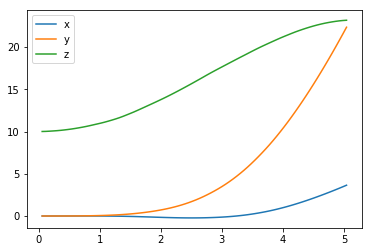

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

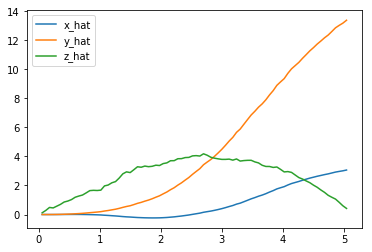

In [5]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

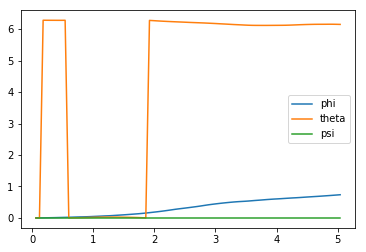

In [6]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

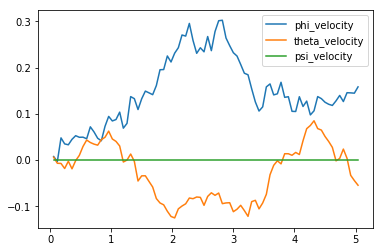

In [7]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

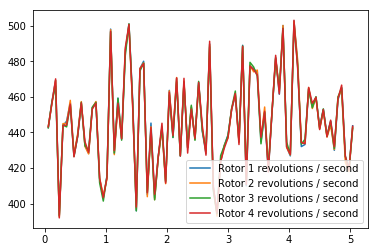

In [8]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [9]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  3.64467302  22.34336568  23.1690347    0.73656482   6.1509498    0.        ]
[  3.06450071  13.38201638   0.42000583]
[ 0.15811181 -0.05445806  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 500
init_pose = np.array([0., 0., 0., 0., 0., 0.]) 
target_pos = np.array([0, 0, 30.])
task = Task(init_pose=init_pose, target_pos=target_pos, runtime = 5.)

agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()
    
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

Episode =   63, score = -90.000 (best = -90.000), noise_scale = 3.25

/home/workspace/physics_sim.py:114: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D
/home/workspace/physics_sim.py:114: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Episode =  500, score = -90.000 (best = -90.000), noise_scale = 3.2[ 0.  0.  0.  0.  0.  0.]
[ 0.          0.         -0.58878815]
[ 0.  0.  0.]


This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [22]:
## TODO: Train your agent here.
from agents.my_agent import DDPG
from task import Task

num_episodes = 650
init_pose = np.array([0., 0., 0., 0., 0., 0.]) 
target_pos = np.array([0, 0, 30.])
task = Task(init_pose=init_pose, target_pos=target_pos, runtime = 5.)
agent = DDPG(task) 

all_episodes = []
all_scores = []
results = {}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            all_episodes.append(i_episode)
            all_scores.append(agent.score)
            break
    sys.stdout.flush()
print (' mean is {:7.3f}'.format(np.mean(all_scores)))


Episode =  650, score = 177.674 (best = 186.730), noise_scale = 3.225 mean is -49.380


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

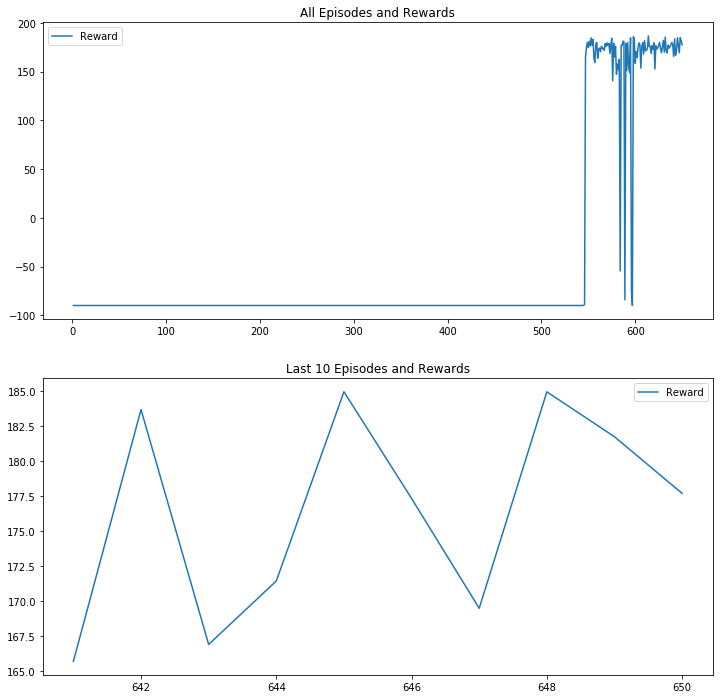

In [23]:
## TODO: Plot the rewards.
fig = plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.plot(all_episodes[:], all_scores[:], label='Reward')
plt.title('All Episodes and Rewards')
plt.legend()

plt.subplot(2,1,2)
plt.plot(all_episodes[-10:], all_scores[-10:], label='Reward')
plt.title('Last 10 Episodes and Rewards')
plt.legend()
plt.show()



## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: The task was relativley simple.  The aim was to reach and maintain a height of 30M starting on the ground within the specified runtime.  The x,y position of the quadcopter should try to be close to the takeoff position before runtime finishes.

The following reward function was specified.
* While the quadcopter is below the height of the target a variable negative reward is made.  The closer the quadcopter is to the target height the less negative the reward would be.
*  I wanted the quadcopter to reach the height with as little x,y difference compared to takeoff.  Therefore there was a smaller negative reward allocated each step for this difference between current state and target.
* For every time interval that the quadcopter is at or above the height a positive fixed reward was given (no increased reward for flying higher).  The negative for deviating from x,y position was still provided so there was an incentive to reduce this even when the target height was met. 
* The sooner the quadcopter reached that height the more reward would be received with the outstanding runtime.    

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
- I used the 'Deep Deterministic Policy Gradient' (DDPG) as initially presented by Lillicrap, Timothy P., et al. and described in the projects concepts.  From there I modified parameters till a suitable model was created.
- The parameters of the DDPG agent did not change significantly, the only one changed which helped make an improvement was adjusting tau for the weighted learning rate from the initial 0.01 to 0.005.
    - gamma 0.99
    - tau 0.005
    - buffer size 100000
    - batch size 64
- A neural network architecture was used and followed a similar architecture as presented in the concepts.  However for improvements without negatively impacting compute time the following changes were made. (the full model can be seen below)
    - Actor 
        - I increased the first hidden layer density to 64, follwed by a 50% dropout, an two more layers of 128, 64 followed again by 50% dropout. 
        - I found that with the final output layer using sigmoid (0-1) activation the learning was more erratic and inconsistent.  Moving this to tanh improved performance and a rate of increased learning.
    - Critic 
        - Architecture remained similar to the initially presented model.  However I added an additional hidden layer with dropout of 50% following the 64 density layer, a new dense layer of 128 followed by a 50% dropout.

In [19]:
print('Critic Model')
display(agent.critic_local.model.summary())
print('\nActor Model')
display(agent.actor_local.model.summary())

Critic Model
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
actions (InputLayer)            (None, 4)            0                                            
__________________________________________________________________________________________________
states (InputLayer)             (None, 18)           0                                            
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 32)           160         actions[0][0]                    
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 64)           1216        states[0][0]                     
________________________________________________________________________________________________

None


Actor Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
states (InputLayer)          (None, 18)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                1216      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
raw_actions (Dense)          (None, 4)                 260     

None

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
- I think the task itself was simple to learn.  The target location was just height so other portential parameters such as reaching a particular destination or maintaining a min/max velocity etc. were not needed. However, it did take the agent some time to improve its score.  You can see on the plot that it took over 550 episodes before any improvement was made.  On repeated tests this takes between 500 to 700 episodes.
- Following the 550 episodes which showed very little improvement (scores were very static at around 90), there was a significant improvement in performance very quickly. I would class this as an 'aha' moment as the improvement when seen was very quick and did not improve significantly over the next 100 episodes, and in some instances show a drop in performance.
- Looking at the last 10 rewards you can see in the chart the range of scores between 165 and 185.  The best score of this block of 650 episodes being close to those of the last 10.  If the learning count extends much further e.g. 800, 1000 + episodes then performance begins to deteriorate and fluctuate more dramatically.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
- It took some time initially to get a bare bones DDPG model working and much longer to get to a point where it felt there was improvement. Choosing a simple task I think was a good idea as even with this there were so many components to consider.  Even with a simple task the profile/definition/reward side took some thought, but more so on the parameter changes at the actor/critic portions.  The volume of repeated episodes required was surprising and a significant improvement in quality was seen when changing the actor's output layer away from a sigmoid 0-1 scale to tanh -1 to 1.  
- It was interesting that the quadcopter model would complete to a finished state if it landed.  Using an action_low of 0 meant that there were many times an episode would finish irrespective of runtime.  I could improve this by setting an action_low value to be something other than 0 but then the learning was much simpler and I thought this less useful than proving a RL model could find better parameters. I was surprise to see initially that it took over 500 episodes before any change in improvement was seen; from there it was very dramatic.  Seeing this jump for the first time was surprising but additionally very satisfying.